Configurar matplotlib para ver las gráficas en linea

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Lista de atlas del cerebelo en fsl

In [4]:
%%sh
ls -lias /opt/fsl-5.0.10/data/atlases/Cerebellum/

total 1812
6201078   4 drwxr-xr-x  2 7959 1999   4096 Apr 24  2017 .
6201077   4 drwxr-xr-x 16 7959 1999   4096 Apr 24  2017 ..
6201079  44 -rw-r--r--  1 7959 1999  44555 Feb 27  2009 Cerebellum-MNIflirt-maxprob-thr0-1mm.nii.gz
6201080  12 -rw-r--r--  1 7959 1999   9433 Feb 27  2009 Cerebellum-MNIflirt-maxprob-thr0-2mm.nii.gz
6201081  36 -rw-r--r--  1 7959 1999  34698 Feb 27  2009 Cerebellum-MNIflirt-maxprob-thr25-1mm.nii.gz
6201082   8 -rwxr-xr-x  1 7959 1999   6926 Feb 25  2009 Cerebellum-MNIflirt-maxprob-thr25-2mm.nii.gz
6201083  32 -rw-r--r--  1 7959 1999  30946 Feb 27  2009 Cerebellum-MNIflirt-maxprob-thr50-1mm.nii.gz
6201084   8 -rw-r--r--  1 7959 1999   6245 Feb 27  2009 Cerebellum-MNIflirt-maxprob-thr50-2mm.nii.gz
6201085 700 -rw-r--r--  1 7959 1999 712945 Feb 26  2009 Cerebellum-MNIflirt-prob-1mm.nii.gz
6201086  96 -rwxr-xr-x  1 7959 1999  96399 Feb 24  2009 Cerebellum-MNIflirt-prob-2mm.nii.gz
6201087  44 -rw-r--r--  1 7959 1999  41376 Feb 27  2009 Cerebellum-MNIfnirt-maxprob-

Lazy load del atlas y del archivo de neuroimagen para probar el atlas

In [7]:
fsl_prob_cerebelo = "/opt/fsl-5.0.10/data/atlases/Cerebellum/Cerebellum-MNIfnirt-prob-1mm.nii.gz"
func_filenames = "/home/elekin/datos-niix/preproc/_session_id_1_subject_id_T004/remove_noise/detrend_regfilt.nii.gz"

NiftiMapsMasker para extraer las señales del cerebelo. NiftiMapsMasker es útil cuando se deben extraer datos de volúmenes superpuestos 

In [8]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=fsl_prob_cerebelo,memory='nilearn_cache', verbose=True, standardize=True)

Overview de algunos indicadores de las imagenes

In [9]:
import nibabel as nb
fmri_img = nb.load(func_filenames)
cbl_img = nb.load(fsl_prob_cerebelo)
mask_img = nb.load(mask_file)

In [10]:
print(fmri_img.shape)
print(cbl_img.shape)
print(mask_img.shape)

(61, 73, 61, 158)
(182, 218, 182, 28)
(256, 256, 256, 1)


In [11]:
n_regions = cbl_img.shape[-1]
n_regions

28

Entrenamiento del modelo para aplicar la extracción del cerebelo

In [12]:
masker.fit()

[NiftiMapsMasker.fit] loading regions from /opt/fsl-5.0.10/data/atlases/Cerebellum/Cerebellum-MNIfnirt-prob-1mm.nii.gz


NiftiMapsMasker(allow_overlap=True, detrend=False, dtype=None, high_pass=None,
                low_pass=None,
                maps_img='/opt/fsl-5.0.10/data/atlases/Cerebellum/Cerebellum-MNIfnirt-prob-1mm.nii.gz',
                mask_img=None, memory='nilearn_cache', memory_level=0,
                resampling_target='data', smoothing_fwhm=None, standardize=True,
                t_r=None, verbose=True)

Extracción de las series temporales dado el atlas de probabilidad del cerebelo a partir de las imágenes fmri.

In [13]:
timeseries_subject = masker.transform(func_filenames, confounds=None)

Resampling maps


/opt/miniconda-latest/envs/elekin/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f23c8d8ab00>, interpolation='continuous', target_shape=(61, 73, 61), target_affine=array([[  -3.,   -0.,   -0.,   90.],
       [   0.,    3.,   -0., -126.],
       [  -0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]]))


/opt/miniconda-latest/envs/elekin/lib/python3.6/site-packages/nilearn/input_data/nifti_maps_masker.py:274: UserWarning: Persisting input arguments took 23.30s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  target_affine=ref_img.affine)


____________________________________________________resample_img - 59.4s, 1.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/elekin/datos-niix/preproc/_session_id_1_subject_id_T004/remove_noise/detrend_regfilt.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/opt/fsl-5.0.10/data/atlases/Cerebellum/Cerebellum-MNIfnirt-prob-1mm.nii.gz',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=True)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/elekin/datos-niix/preproc/_session_id_1_subject_id_T004/remove_noise/detrend_regfilt.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region

Gráfica de las 28 series temporales extraidas

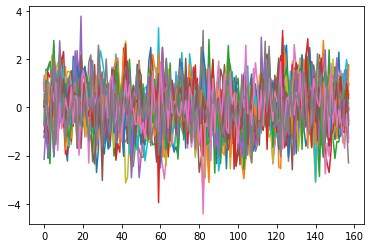

In [14]:
fig = plt.figure()
plt.plot(timeseries_subject)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [15]:
timeseries_subject.shape

(158, 28)

/opt/miniconda-latest/envs/elekin/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)
/opt/miniconda-latest/envs/elekin/lib/python3.6/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/opt/miniconda-latest/envs/elekin/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: linewidths is ignored by contourf
  **kwargs)


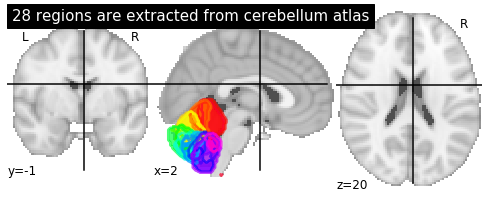

In [16]:
from nilearn import (image, plotting)
masker_extracted_img = masker.maps_img_
# Total number of regions extracted
masker_n_regions_extracted = masker_extracted_img.shape[-1]
  # Visualization of region extraction results
title = ('%d regions are extracted from cerebellum atlas'
           % (masker_n_regions_extracted)) 
plotting.plot_prob_atlas(masker.maps_img, view_type='filled_contours',
                           title=title
                           )